In [1]:
!python --version

Python 3.10.11


참고) 구글 코랩에서 바른 사용하기 : https://bareun.ai/docs

In [2]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sklearn as sk
import tensorflow as tf
from tensorflow import keras

In [4]:
# 데이터 불러오기
dataset_path = '/content/drive/MyDrive/value up/dataset/'
data = pd.read_csv(dataset_path + 'BukGu.csv')

data.head()

,content,dept
0,매천동 청구 장미아파트 삼우 그린 입구 불합리 위치 매천동 청구 장미아파트 삼우 그...,도시국 건설과
1,처리 중 언제까지 어린이보호구역 불법주차 불법적 재 신고한 지가 언제인데 아직 처리...,도시국 도시행정과
2,도로 개설 본인은 대구시 북구 태전동 번지 토지 소유자입니다 현재 상기 토지에서 농...,도시국 건설과
3,북구청장 감사실은 뭐 하는 곳입니까 묻습니다 불법에 대한 최고의 북구 전문가 북구청...,감사실
4,대구시장 북구청장 감사실은 뭐 하는 부서입니까 감사실 폐쇄하셔요 미관지구 대구시장 ...,감사실


In [5]:
# train_data, valid_data 분리
from sklearn.model_selection import train_test_split

train_data, valid_data = train_test_split(data, test_size=0.2, random_state=1, stratify=data['dept'])

train_data

,content,dept
4878,가계 출입문 앞 우천 시 물고임 현상 해결 요구 원인 인도블록 침하 가계 출입문 앞...,도시국 건설과
3155,금호동 번지 일대 주택단지 민원 확인 요청 건 동일고충민원여부동일고충민원여부 선행 ...,도시국 교통과
3887,아린이 보호 구역 내 생활 산업폐기물 방치 산격 시장 아파트 앞 도로 공용 주차장 ...,복지환경국 환경관리과
1580,저희 집 빌라 단지 앞에 저희 집 앞에 공사를 하다 만 곳이 있습니다 거기에는 빈 ...,도시국 건축주택과
5244,금호강변 낚시터 자리 만드는 거 안 되도록 해 주세요 동변동에 살고 있고 밤이면 강...,도시국 건설과
...,...,...
2991,재요청 전봇대 쓰레기 무단투기 월일 번으로 민원 요청했던 사람입니다 민원 올린 후 ...,복지환경국 환경관리과
3668,쓰레기 무단투기 금지 안내판 훼손으로 인한 교체 요청 상가 운영 중입니다 가게 앞 ...,복지환경국 환경관리과
6407,동변동 화요 시장 동변 식장 안에 상가를 하고 있는 사람인데 지금 물가가 판치고 있...,도시국 재난안전과
1728,대구시장 북구청장 이제는 인도 도로 주차선 시민 북구만 주민 학생에게 돌려주셔요 대...,감사실


In [6]:
x_train = train_data.loc[:, 'content'].values
y_train = train_data.loc[:, 'dept'].values
x_valid = valid_data.loc[:, 'content'].values
y_valid = valid_data.loc[:, 'dept'].values

In [7]:
# 바른 다운로드 (리눅스 설치본)
!curl -LJks -H "uname:$(uname -a)" https://bareun.ai/api/get -o bareun-linux.deb
!ls

bareun-linux.deb  drive  sample_data


In [8]:
# 바른 설치
!uname -a
!dpkg -i bareun-linux.deb

Linux 5e94f79d2aa7 5.10.147+ #1 SMP Sat Dec 10 16:00:40 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux
Selecting previously unselected package bareun.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack bareun-linux.deb ...
Unpacking bareun (2.0.3) ...
Setting up bareun (2.0.3) ...
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
Created symlink /etc/systemd/system/multi-user.target.wants/bareun.service → /etc/systemd/system/bareun.service.


In [9]:
# GPU를 이용하기 위한 tensorflow 설치
!curl -O https://storage.googleapis.com/tensorflow/libtensorflow/libtensorflow-gpu-linux-x86_64-2.9.1.tar.gz
!tar -C /opt/bareun -xzf libtensorflow-gpu-linux-x86_64-2.9.1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  392M  100  392M    0     0  28.7M      0  0:00:13  0:00:13 --:--:-- 30.3M


In [10]:
# 환경 설정하기
%env BAREUN_ROOT="/opt/bareun"
%env LD_LIBRARY_PATH="/opt/bareun/lib"
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" nohup /opt/bareun/bin/bareun&

env: BAREUN_ROOT="/opt/bareun"
env: LD_LIBRARY_PATH="/opt/bareun/lib"
nohup: appending output to 'nohup.out'


In [11]:
# 바른 서버가 실행된 정보 표시
!ps -ef | grep bareun

root        4949       1  0 15:47 ?        00:00:00 /opt/bareun/bin/bareun
root        4950    2835  0 15:47 ?        00:00:00 /bin/bash -c ps -ef | grep bareun
root        4952    4950  0 15:47 ?        00:00:00 grep bareun


In [17]:
# API키 등록 ('200 OK' 문구 확인)
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" /opt/bareun/bin/bareun -reg koba-RBKJYUY-YKLU76Q-UXI6RFY-JXP6MRA

Use config file: /opt/bareun/config/bareun.json

------
200 OK
sucessfully registered koba-RBKJYUY-YKLU76Q-UXI6RFY-JXP6MRA


In [13]:
# PIP 패키지 설치
!pip install -U bareunpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
# 바른 Python 라이브러리 사용
import sys
import bareunpy as brn
import google.protobuf.text_format as tf
API_KEY = "koba-RBKJYUY-YKLU76Q-UXI6RFY-JXP6MRA"

# 바른 형태소 분석기 선언
t = brn.Tagger(API_KEY, "localhost", 5656)

In [19]:
# 텍스트 입력 -> 형태소 분석 결과를 리스트로 반환
def bareun_transform(text):
    # 500자 단위로 슬라이싱
    ready_list = []
    while (len(text) > 500):
        temp_str = text[:500]
        last_space = temp_str.rfind(' ') # 앞에서 가장 가까운 공백 ' ' 위치를 찾는다
        temp_str = text[0:last_space]
        ready_list.append(temp_str) # 문자열을 약 500자 단위로 나누어 리스트에 추가한다.

        text = text[last_space:] # 슬라이싱 한 문자는 text에서 제거
    ready_list.append(text) # 500자 이하로 남은 문자열을 마지막에 추가한다.
    
    result_list = []
    for ready in ready_list:
        result = t.tags([ready]).morphs()
        result_list.append(result)

    return sum(result_list, [])

In [20]:
# content 토큰화
train_data['content_tk'] = train_data['content'].apply(lambda x: bareun_transform(x))
valid_data['content_tk'] = valid_data['content'].apply(lambda x: bareun_transform(x))

train_data

,content,dept,content_tk
4878,가계 출입문 앞 우천 시 물고임 현상 해결 요구 원인 인도블록 침하 가계 출입문 앞...,도시국 건설과,"[가계, 출입문, 앞, 우천, 시, 물고임, 현상, 해결, 요구, 원인, 인도블록,..."
3155,금호동 번지 일대 주택단지 민원 확인 요청 건 동일고충민원여부동일고충민원여부 선행 ...,도시국 교통과,"[금호동, 번지, 일대, 주택, 단지, 민원, 확인, 요청, 건, 동일, 고충, 민..."
3887,아린이 보호 구역 내 생활 산업폐기물 방치 산격 시장 아파트 앞 도로 공용 주차장 ...,복지환경국 환경관리과,"[아린이, 보호, 구역, 내, 생활, 산업, 폐기물, 방치, 산격, 시장, 아파트,..."
1580,저희 집 빌라 단지 앞에 저희 집 앞에 공사를 하다 만 곳이 있습니다 거기에는 빈 ...,도시국 건축주택과,"[저희, 집, 빌라, 단지, 앞, 에, 저희, 집, 앞, 에, 공사, 를, 하, 다..."
5244,금호강변 낚시터 자리 만드는 거 안 되도록 해 주세요 동변동에 살고 있고 밤이면 강...,도시국 건설과,"[금호강, 변, 낚시터, 자리, 만들, 는, 거, 안, 되, 도록, 하, 아, 주,..."
...,...,...,...
2991,재요청 전봇대 쓰레기 무단투기 월일 번으로 민원 요청했던 사람입니다 민원 올린 후 ...,복지환경국 환경관리과,"[재, 요청, 전봇대, 쓰레기, 무단, 투기, 월일, 번, 으로, 민원, 요청하, ..."
3668,쓰레기 무단투기 금지 안내판 훼손으로 인한 교체 요청 상가 운영 중입니다 가게 앞 ...,복지환경국 환경관리과,"[쓰레기, 무단, 투기, 금지, 안내판, 훼손, 으로, 인하, ㄴ, 교체, 요청, ..."
6407,동변동 화요 시장 동변 식장 안에 상가를 하고 있는 사람인데 지금 물가가 판치고 있...,도시국 재난안전과,"[동변동, 화요, 시장, 동변, 식장, 안, 에, 상가, 를, 하, 고, 있, 는,..."
1728,대구시장 북구청장 이제는 인도 도로 주차선 시민 북구만 주민 학생에게 돌려주셔요 대...,감사실,"[대구시장, 북구청장, 이제, 는, 인도, 도로, 주차선, 시민, 북구만, 주민, ..."


In [21]:
#gensim은 자연어 처리를 위한 오픈소스 라이브러리입니다. 토픽 모델링, 워드 임베딩 등 다양한 자연어 처리 기능을 제공
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import gensim
gensim.__version__

'4.3.1'

In [24]:
from gensim.models.fasttext import FastText

# fasttext 모델 생성
ft_model = FastText(sentences=train_data['content_tk'].values, min_count=5, vector_size=1000, window=5)

In [25]:
# Word2Vec 모델로부터 하나의 문장을 벡터화 시키는 함수
def get_sent_embedding(model, embedding_size, tokenized_words):
    # 임베딩 벡터를 0으로 초기화
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    # 단어 개수 초기화
    n_words = 0
    # 모델 단어 집합 생성
    index2word_set = set(model.wv.index_to_key)
    # 문장의 단어들을 하나씩 반복
    for word in tokenized_words:
        # 모델 단어 집합에 해당하는 단어일 경우에만
        if word in index2word_set:
            # 단어 개수 1 증가
            n_words += 1
            # 임베딩 벡터에 해당 단어의 벡터를 더함
            feature_vec = np.add(feature_vec, model.wv[word])
    # 단어 개수가 0보다 큰 경우 벡터를 단어 개수로 나눠줌 (평균 임베딩 벡터 계산)
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [26]:
# 문장벡터 데이터 셋 만들기
def get_dataset(sentences, model, num_features):
    dataset = list()

    # 각 문장을 벡터화해서 리스트에 저장
    for sent in sentences:
        dataset.append(get_sent_embedding(model, num_features, sent))

    # 리스트를 numpy 배열로 변환하여 반환
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

In [27]:
# word2vec로 벡터화
train_data['content_vec'] = train_data['content_tk'].apply(lambda x: get_sent_embedding(ft_model, ft_model.vector_size, x))
valid_data['content_vec'] = valid_data['content_tk'].apply(lambda x: get_sent_embedding(ft_model, ft_model.vector_size, x))

train_data

,content,dept,content_tk,content_vec
4878,가계 출입문 앞 우천 시 물고임 현상 해결 요구 원인 인도블록 침하 가계 출입문 앞...,도시국 건설과,"[가계, 출입문, 앞, 우천, 시, 물고임, 현상, 해결, 요구, 원인, 인도블록,...","[-0.016922537, -0.07105667, 0.023232948, 0.004..."
3155,금호동 번지 일대 주택단지 민원 확인 요청 건 동일고충민원여부동일고충민원여부 선행 ...,도시국 교통과,"[금호동, 번지, 일대, 주택, 단지, 민원, 확인, 요청, 건, 동일, 고충, 민...","[-0.18692575, 0.04404163, -0.119667925, 0.0532..."
3887,아린이 보호 구역 내 생활 산업폐기물 방치 산격 시장 아파트 앞 도로 공용 주차장 ...,복지환경국 환경관리과,"[아린이, 보호, 구역, 내, 생활, 산업, 폐기물, 방치, 산격, 시장, 아파트,...","[0.08224008, 0.068596095, 0.103666335, 0.01748..."
1580,저희 집 빌라 단지 앞에 저희 집 앞에 공사를 하다 만 곳이 있습니다 거기에는 빈 ...,도시국 건축주택과,"[저희, 집, 빌라, 단지, 앞, 에, 저희, 집, 앞, 에, 공사, 를, 하, 다...","[-0.025421537, -0.05984043, -0.082744606, -0.0..."
5244,금호강변 낚시터 자리 만드는 거 안 되도록 해 주세요 동변동에 살고 있고 밤이면 강...,도시국 건설과,"[금호강, 변, 낚시터, 자리, 만들, 는, 거, 안, 되, 도록, 하, 아, 주,...","[0.0032169768, -0.052851982, 0.027784714, -0.0..."
...,...,...,...,...
2991,재요청 전봇대 쓰레기 무단투기 월일 번으로 민원 요청했던 사람입니다 민원 올린 후 ...,복지환경국 환경관리과,"[재, 요청, 전봇대, 쓰레기, 무단, 투기, 월일, 번, 으로, 민원, 요청하, ...","[-0.06792854, -0.07010504, -0.07103745, 0.1145..."
3668,쓰레기 무단투기 금지 안내판 훼손으로 인한 교체 요청 상가 운영 중입니다 가게 앞 ...,복지환경국 환경관리과,"[쓰레기, 무단, 투기, 금지, 안내판, 훼손, 으로, 인하, ㄴ, 교체, 요청, ...","[0.110623464, 0.029386384, -0.025714248, -0.03..."
6407,동변동 화요 시장 동변 식장 안에 상가를 하고 있는 사람인데 지금 물가가 판치고 있...,도시국 재난안전과,"[동변동, 화요, 시장, 동변, 식장, 안, 에, 상가, 를, 하, 고, 있, 는,...","[0.0056808516, -0.066105865, -0.07025345, 0.00..."
1728,대구시장 북구청장 이제는 인도 도로 주차선 시민 북구만 주민 학생에게 돌려주셔요 대...,감사실,"[대구시장, 북구청장, 이제, 는, 인도, 도로, 주차선, 시민, 북구만, 주민, ...","[-0.035933826, -0.019912217, -0.10046957, 0.12..."


In [28]:
# 인덱스 다시 매기기
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

train_data

,content,dept,content_tk,content_vec
0,가계 출입문 앞 우천 시 물고임 현상 해결 요구 원인 인도블록 침하 가계 출입문 앞...,도시국 건설과,"[가계, 출입문, 앞, 우천, 시, 물고임, 현상, 해결, 요구, 원인, 인도블록,...","[-0.016922537, -0.07105667, 0.023232948, 0.004..."
1,금호동 번지 일대 주택단지 민원 확인 요청 건 동일고충민원여부동일고충민원여부 선행 ...,도시국 교통과,"[금호동, 번지, 일대, 주택, 단지, 민원, 확인, 요청, 건, 동일, 고충, 민...","[-0.18692575, 0.04404163, -0.119667925, 0.0532..."
2,아린이 보호 구역 내 생활 산업폐기물 방치 산격 시장 아파트 앞 도로 공용 주차장 ...,복지환경국 환경관리과,"[아린이, 보호, 구역, 내, 생활, 산업, 폐기물, 방치, 산격, 시장, 아파트,...","[0.08224008, 0.068596095, 0.103666335, 0.01748..."
3,저희 집 빌라 단지 앞에 저희 집 앞에 공사를 하다 만 곳이 있습니다 거기에는 빈 ...,도시국 건축주택과,"[저희, 집, 빌라, 단지, 앞, 에, 저희, 집, 앞, 에, 공사, 를, 하, 다...","[-0.025421537, -0.05984043, -0.082744606, -0.0..."
4,금호강변 낚시터 자리 만드는 거 안 되도록 해 주세요 동변동에 살고 있고 밤이면 강...,도시국 건설과,"[금호강, 변, 낚시터, 자리, 만들, 는, 거, 안, 되, 도록, 하, 아, 주,...","[0.0032169768, -0.052851982, 0.027784714, -0.0..."
...,...,...,...,...
5463,재요청 전봇대 쓰레기 무단투기 월일 번으로 민원 요청했던 사람입니다 민원 올린 후 ...,복지환경국 환경관리과,"[재, 요청, 전봇대, 쓰레기, 무단, 투기, 월일, 번, 으로, 민원, 요청하, ...","[-0.06792854, -0.07010504, -0.07103745, 0.1145..."
5464,쓰레기 무단투기 금지 안내판 훼손으로 인한 교체 요청 상가 운영 중입니다 가게 앞 ...,복지환경국 환경관리과,"[쓰레기, 무단, 투기, 금지, 안내판, 훼손, 으로, 인하, ㄴ, 교체, 요청, ...","[0.110623464, 0.029386384, -0.025714248, -0.03..."
5465,동변동 화요 시장 동변 식장 안에 상가를 하고 있는 사람인데 지금 물가가 판치고 있...,도시국 재난안전과,"[동변동, 화요, 시장, 동변, 식장, 안, 에, 상가, 를, 하, 고, 있, 는,...","[0.0056808516, -0.066105865, -0.07025345, 0.00..."
5466,대구시장 북구청장 이제는 인도 도로 주차선 시민 북구만 주민 학생에게 돌려주셔요 대...,감사실,"[대구시장, 북구청장, 이제, 는, 인도, 도로, 주차선, 시민, 북구만, 주민, ...","[-0.035933826, -0.019912217, -0.10046957, 0.12..."


In [29]:
%%time
# 한 문장만 테스트
from sklearn.metrics.pairwise import cosine_similarity

vec = train_data.loc[0, 'content_vec'] # 예시 입력

vec = vec.reshape(1,-1) # cosine_similarity를 사용하기 위해서 reshape

similarity_list = []
for i in range(len(train_data)):
    v = train_data.loc[i, 'content_vec'].reshape(1,-1) # cosine_similarity를 사용하기 위해서 reshape
    
    similarity = cosine_similarity(vec, v)[0][0] # 유사도 계산
    
    similarity_list.append(similarity)


max_idx = similarity_list.index(max(similarity_list)) # 유사도가 가장 높은 행의 인덱스
dept_val = train_data.loc[max_idx, 'dept'] # 유사도가 가장 높은 행의 dept
dept_val

CPU times: user 1.81 s, sys: 85.9 ms, total: 1.9 s
Wall time: 1.81 s


'도시국 건설과'

In [30]:
# 유사도 계산

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

# 유사도를 계산하여 내용이 가장 비슷한 민원의 부서를 반환
def cal_cosine_similarity(vec):
    vec = vec.reshape(1,-1) # cosine_similarity를 사용하기 위해서 reshape

    similarity_list = []
    for i in range(len(train_data)):
        v = train_data.loc[i, 'content_vec'].reshape(1,-1) # cosine_similarity를 사용하기 위해서 reshape
        
        similarity = cosine_similarity(vec, v)[0][0] # 유사도 계산
        
        similarity_list.append(similarity)


    max_idx = similarity_list.index(max(similarity_list))
    dept_val = train_data.loc[max_idx, 'dept']
    
    return dept_val

In [ ]:
%%time
# validation
y_pred = []
for i in range(len(valid_data)):
    vec = valid_data.loc[i, 'content_vec'] # valid 데이터 중 하나 불러오기

    y_pred.append(cal_cosine_similarity(vec)) # predict

    print('Processing row:', i)

y_pred

In [33]:
y_valid = valid_data.loc[:, 'dept'].values # 정답
y_valid

array(['도시국 교통과', '감사실', '감사실', ..., '도시국 교통과', '도시국 건축주택과', '도시국 도시관리과'],
      dtype=object)

y_valid: ['도시국 교통과' '감사실' '감사실' '도시국 건축주택과' '읍/면/동사무소' '도시국 건축주택과' '감사실' '도시국 건설과'
 '도시국 교통과' '도시국 건설과']
y_pred: ['도시국 교통과', '감사실', '감사실', '도시국 건축주택과', '읍/면/동사무소', '도시국 건축주택과', '감사실', '읍/면/동사무소', '도시국 도시행정과', '도시국 도시관리과']
accuracy: 0.5767543859649122
f1 score: 0.3937543764117142


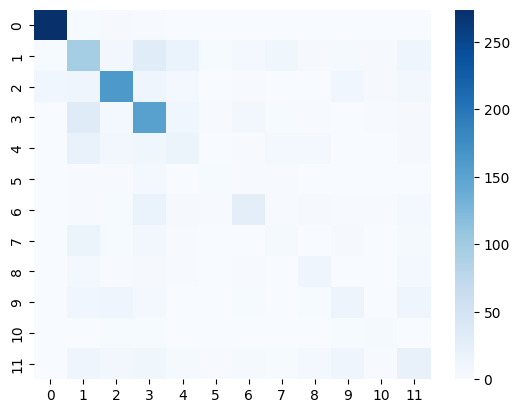

               precision    recall  f1-score   support

          감사실       0.95      0.96      0.95       285
      도시국 건설과       0.46      0.47      0.46       206
    도시국 건축주택과       0.72      0.70      0.71       231
      도시국 교통과       0.57      0.68      0.62       224
    도시국 도시관리과       0.24      0.21      0.22        78
    도시국 도시행정과       0.18      0.17      0.17        18
    도시국 재난안전과       0.46      0.37      0.41        73
  문화녹지국 공원녹지과       0.14      0.11      0.12        45
  복지환경국 자원순환과       0.30      0.32      0.31        37
  복지환경국 환경관리과       0.26      0.22      0.24        65
     읍/면/동사무소       0.24      0.26      0.25        19
주민생활지원국 환경관리과       0.26      0.24      0.25        87

     accuracy                           0.58      1368
    macro avg       0.40      0.39      0.39      1368
 weighted avg       0.57      0.58      0.57      1368



In [34]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# 정답과 예측 출력
print('y_valid:', y_valid[:10])
print('y_pred:', y_pred[:10])

# accuracy, f1-score 출력
print('accuracy:', accuracy_score(y_valid, y_pred))
print('f1 score:', f1_score(y_valid, y_pred, average='macro'))

# confusion matrix 출력
sns.heatmap(confusion_matrix(y_valid, y_pred), cmap='Blues')
plt.show()

# classification report 출력
print(classification_report(y_valid, y_pred))